In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

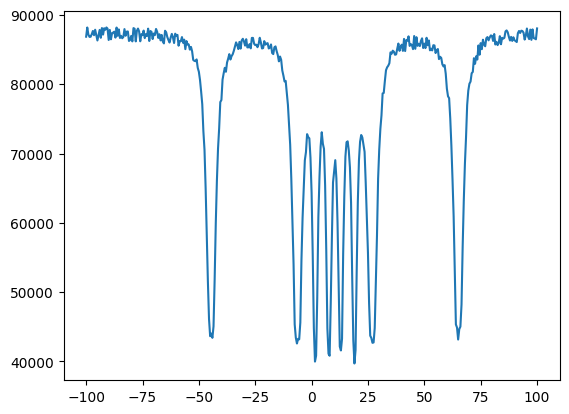

In [2]:
# create reference spectrum

site1 = nx.Hyperfine(
    id = "site 1",
    weight = 0.5,
    isomer = 1,
    magnetic_field = 33,
    isotropic = False)

site2 = nx.Hyperfine(
    id = "site 2",
    weight = 0.5,
    isomer = 1,
    magnetic_field = 10,
    isotropic = False)

lay_Fe = nx.Layer(id = "Fe",
                  material = nx.Material.Template(nx.lib.material.Fe_enriched),
                  thickness = 3000)

lay_Fe.material.hyperfine_sites = [site1, site2]

sample = nx.Sample(id = "sample",
                   layers = [lay_Fe],
                   geometry = "f")

beam  = nx.Beam()
beam.LinearSigma()

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.moessbauer.Fe57,
                    id = "my exp")

detuning = np.arange(-100, 100.1, 0.5)

energy_spec = nx.EnergySpectrum(exp, detuning)

# this intensity will be fit
intensity = energy_spec()

intensity_save = 1e5 * intensity + 2e3* np.random.rand(len(intensity))

plt.plot(detuning, intensity_save)
plt.show()

nx.data.Save('spectrum_equality.txt', [detuning, intensity_save])